# CNN Image Classification

In [2]:
from gc import callbacks
from google.colab import drive
import tensorflow as tf
import numpy as np
import pandas as pd
import PIL
import cv2
import random
import os
from inspect import classify_class_attrs
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import seaborn as sn; sn.set(font_scale =1.4)
from keras.layers import BatchNormalization

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
class_names =['normal', 'sick']
class_label = {class_name: i for i, class_name in enumerate(class_names)}
print (class_label)

IMAGE_SIZE =(150, 150)

{'normal': 0, 'sick': 1}


In [5]:
def load_data(path):
  
  images = []
  labels = []

  print(f"Loading {path}")
  for folder in os.listdir(path):
    label = class_label[folder]

    for f in os.listdir(os.path.join(path, folder)):
      img_path = os.path.join(os.path.join(path, folder), f)

      image = cv2.imread(img_path)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      image = cv2.resize(image, IMAGE_SIZE)
      
      images.append(image)
      labels.append(label)     

  images = np.array(images, dtype = 'float32')
  labels = np.array(labels, dtype ='int32')
  
  return images, labels

In [6]:
directory = '/content/drive/MyDrive/knwn_images'
train_images, train_labels = load_data(f'{directory}/Training')
test_images, test_labels = load_data(f'{directory}/Testing')

Loading /content/drive/MyDrive/knwn_images/Training
Loading /content/drive/MyDrive/knwn_images/Testing


In [7]:
train_images, train_labels = shuffle(train_images, train_labels, random_state =25)

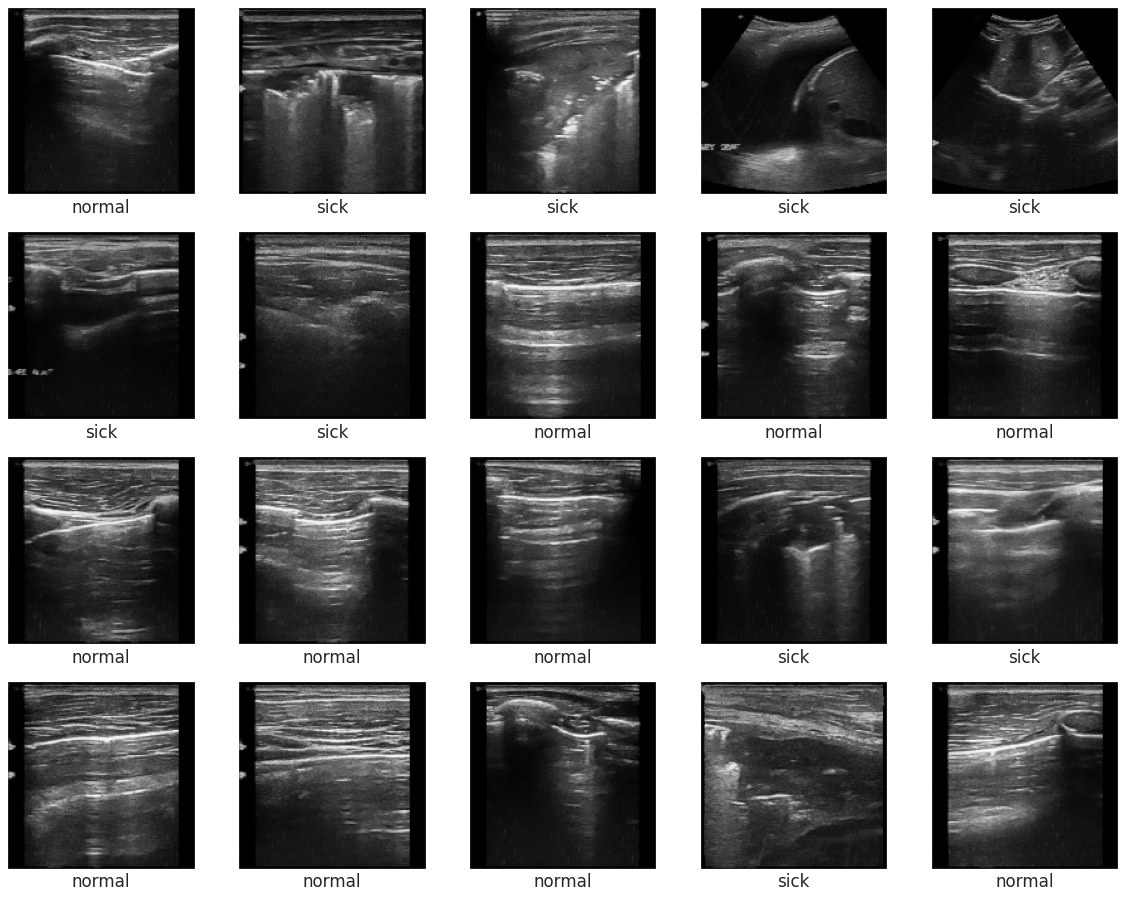

In [8]:
def display_sample(class_names, images, labels, num_samples=20):
  # Displays a random sample of the images with labels.
  figsize =(20,20)
  fig = plt.figure(figsize=figsize)
  indices = random.sample(range(len(images)), num_samples)
  for i, idx in enumerate(indices):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[idx].astype(np.uint8))
    plt.xlabel(class_names[labels[idx]])
  plt.show()

display_sample(class_names, train_images, train_labels)

## Run training

In [9]:
model = tf.keras.models.Sequential(
    [tf.keras.layers.Convolution2D(16, (3,3),activation='relu', input_shape=(*IMAGE_SIZE,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Convolution2D(32, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Convolution2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax'),
])

In [ ]:
model.summary()

In [10]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy'],
)

In [11]:
training_results = model.fit(train_images, train_labels, epochs = 15, validation_split=0.2)

Epoch 1/15
15/15 [==============================] - 14s 764ms/step - loss: 227.1458 - accuracy: 0.6258 - val_loss: 0.5103 - val_accuracy: 0.9130
Epoch 2/15
15/15 [==============================] - 11s 736ms/step - loss: 0.4326 - accuracy: 0.8840 - val_loss: 0.6203 - val_accuracy: 0.7565
Epoch 3/15
15/15 [==============================] - 11s 737ms/step - loss: 0.2374 - accuracy: 0.9234 - val_loss: 0.1000 - val_accuracy: 0.9652
Epoch 4/15
15/15 [==============================] - 11s 732ms/step - loss: 0.0185 - accuracy: 0.9934 - val_loss: 2.5623 - val_accuracy: 0.6000
Epoch 5/15
15/15 [==============================] - 11s 729ms/step - loss: 1.1667 - accuracy: 0.8665 - val_loss: 0.2100 - val_accuracy: 0.9304
Epoch 6/15
15/15 [==============================] - 11s 729ms/step - loss: 0.0288 - accuracy: 0.9869 - val_loss: 0.1133 - val_accuracy: 0.9478
Epoch 7/15
15/15 [==============================] - 11s 734ms/step - loss: 0.3327 - accuracy: 0.9497 - val_loss: 96.3842 - val_accuracy: 0.5

In [12]:
def plot_accuracy_loss(history):
  fig = plt.figure(figsize =(15, 10))

  plt.subplot(221)
  plt.plot(history['accuracy'],'bo--', label ='Accuracy')
  plt.plot(history['val_accuracy'],'ro--', label ='Val_Accuracy')
  plt.title("train_accuracy vs val_accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()

  plt.subplot(222)
  plt.plot(history['loss'],'bo--', label ='Loss')
  plt.plot(history['val_loss'],'ro--', label ='Val_Loss')
  plt.title("train_loss vs val_loss")
  plt.ylabel("loss")
  plt.xlabel("epochs")
  
  plt.legend()
  plt.show()

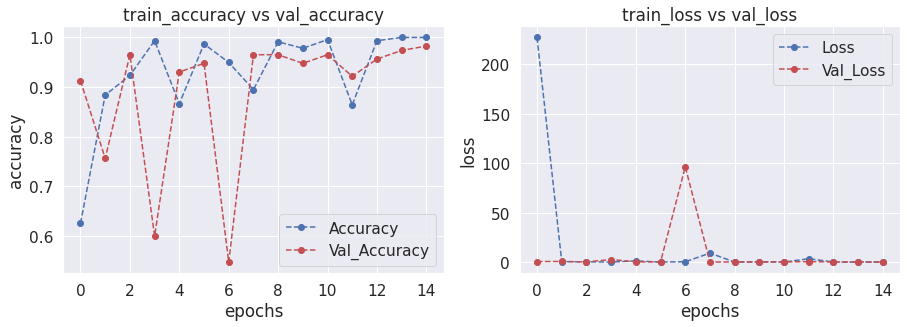

In [13]:
plot_accuracy_loss(training_results.history)

## Evaluating on the test set

In [14]:
test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

5/5 - 1s - loss: 0.1833 - accuracy: 0.9650 - 838ms/epoch - 168ms/step


In [15]:
predictions = model.predict(test_images)
predict_labels = np.argmax(predictions, axis = 1)
print(classification_report(test_labels,predict_labels))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        74
           1       0.98      0.94      0.96        69

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [16]:
model.save('my_model.h5')

## Making predictions on the 'unknown images'

In [16]:
dir_path ='/content/drive/MyDrive/Unknown/unknown_images'
for filename in os.listdir(dir_path):
  img = image.load_img(f'{dir_path}/{filename}', target_size=IMAGE_SIZE)
  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])
  probabilities = model.predict(images)
  predict_labels = np.argmax(probabilities, axis = 1).item()
  res = {
      'probabilities': np.round(probabilities, 2).flatten(),
      'prediction': class_names[predict_labels]
  }
  print(res)

{'probabilities': array([0.96, 0.04], dtype=float32), 'prediction': 'normal'}
{'probabilities': array([1., 0.], dtype=float32), 'prediction': 'normal'}
{'probabilities': array([0., 1.], dtype=float32), 'prediction': 'sick'}
{'probabilities': array([1., 0.], dtype=float32), 'prediction': 'normal'}
{'probabilities': array([1., 0.], dtype=float32), 'prediction': 'normal'}
{'probabilities': array([1., 0.], dtype=float32), 'prediction': 'normal'}
{'probabilities': array([1., 0.], dtype=float32), 'prediction': 'normal'}
{'probabilities': array([1., 0.], dtype=float32), 'prediction': 'normal'}
{'probabilities': array([1., 0.], dtype=float32), 'prediction': 'normal'}
{'probabilities': array([0., 1.], dtype=float32), 'prediction': 'sick'}
{'probabilities': array([1., 0.], dtype=float32), 'prediction': 'normal'}
{'probabilities': array([0., 1.], dtype=float32), 'prediction': 'sick'}
{'probabilities': array([1., 0.], dtype=float32), 'prediction': 'normal'}
{'probabilities': array([1., 0.], dtype=

In [113]:
import keras
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Unknown/unknown_images/42.png", target_size=IMAGE_SIZE
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
results = {'predictions':np.round(predictions, 2).flatten()
           
}

print(results)

{'predictions': array([0., 1.], dtype=float32)}


## Evaluating on dataset 2

In [18]:
dataset2_images, dataset2_labels = load_data('/content/drive/MyDrive/dataset2-imgs')

Loading /content/drive/MyDrive/dataset2-imgs


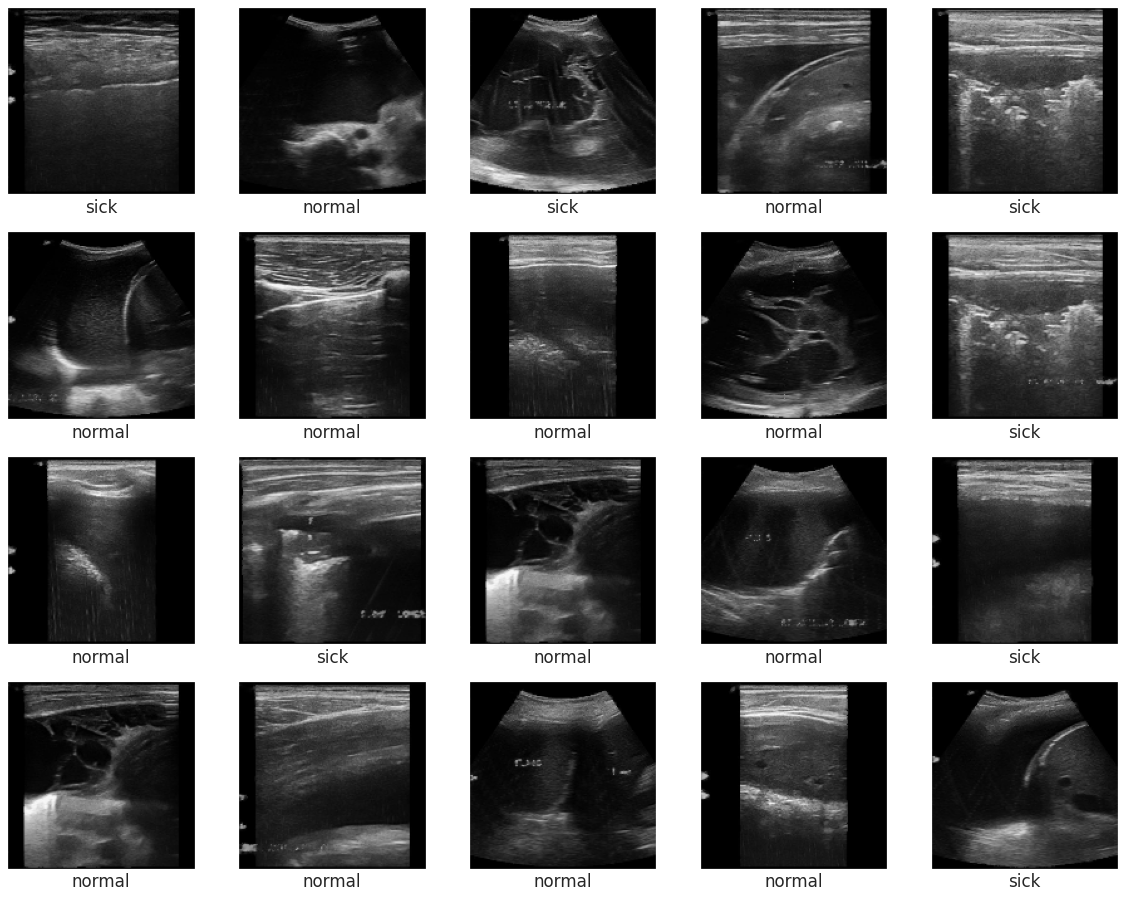

In [19]:
display_sample(class_names, dataset2_images, dataset2_labels)

In [20]:
dataset2_accuracy = model.evaluate(dataset2_images, dataset2_labels, verbose=2)

7/7 - 1s - loss: 14.8602 - accuracy: 0.5402 - 1s/epoch - 210ms/step


In [21]:
predictions = model.predict(dataset2_images)
predict_labels = np.argmax(predictions, axis = 1)
print(classification_report(dataset2_labels, predict_labels))

              precision    recall  f1-score   support

           0       0.80      0.11      0.19       112
           1       0.52      0.97      0.68       112

    accuracy                           0.54       224
   macro avg       0.66      0.54      0.43       224
weighted avg       0.66      0.54      0.43       224



In [22]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(dataset2_labels, predict_labels)

print(cf_matrix)

[[ 12 100]
 [  3 109]]


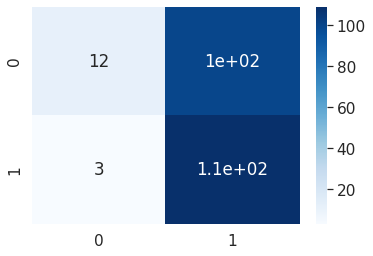

In [23]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.show()